## Python Workshop Week 7 - Exercise

## 15.5 Using TSNE to Visualize the Digits Dataset in 3D

LabAssist: Use the code in Section 15.6, but modify the TSNE object to use three dimensions. 3D plots are not interactive in Jupyter, so run the solution to this exercise as a script to see the cool 3D interactivity.  
NOTE: The following statement in the exercise description:  
       axes = figure.add_subplot(111, projection='3d')  
has been changed in the Matplotlib documentation to axes = figure.add_subplot(projection='3d')

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=11)
import matplotlib.pyplot as plt

In [2]:
reduced_data = tsne.fit_transform(digits.data)
reduced_data.shape

/Users/sarvaripidaparty/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sarvaripidaparty/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1797, 3)

We create a TSNE object for reducing a dataset’s features to 3 dimensions, and this is mentioned as `n_components`.

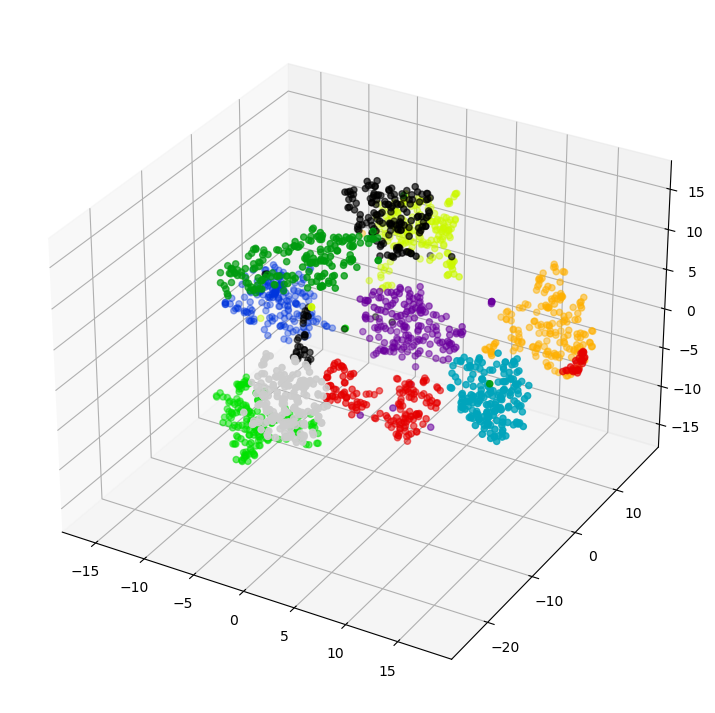

In [3]:
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure(figsize=(9, 9))
axes = figure.add_subplot(projection='3d')
dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1], zs=reduced_data[:, 2], c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

3-D plot of the digits dataset!

## 15.17 Binary Classification with the Breast Cancer Dataset

LabAssist: Use the code from the Digits classification case study in Sections 15.2 and 15.3 that we studied in class as a guide to completing this exercise. Your code will be almost identical, but will use an estimator optimized for binary classification (see the problem description for details).

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
data.target[::100]

array([0, 0, 1, 0, 0, 1])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target.shape

(569,)

In [9]:
data.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11) 

We split the data into training and test data. Print out the size of both of these below.

In [12]:
X_train.shape

(1347, 64)

In [13]:
X_test.shape

(450, 64)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [15]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

####

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB(),
     'Logistic Regression': LogisticRegression(max_iter=5000)}

In [18]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%
 Logistic Regression: mean accuracy=96.11%; standard deviation=1.76%


The `KNN classifier` seems to give the most accurate results with the least standard deviation amongst all the methods.

In [19]:
for k in range(1, 20, 2):
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(estimator=knn, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
